# 2D人体关键点 预训练模型预测-Python API

参考文档：https://github.com/open-mmlab/mmpose/blob/master/demo/docs/2d_human_pose_demo.md

作者：同济子豪兄 2022-06-06

如果报错`CUDA out of memory.`则重启前面几个代码的`kernel`即可。

## 进入 MMPose 主目录

In [1]:
import os
os.chdir('mmpose')
os.listdir()

['.git',
 '.circleci',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmpose',
 'model-index.yml',
 'pytest.ini',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmpose.egg-info',
 'checkpoints',
 'outputs',
 'data']

## 导入工具包

In [2]:
import cv2
from mmpose.apis import inference_top_down_pose_model, init_pose_model, vis_pose_result, process_mmdet_results
from mmdet.apis import inference_detector, init_detector

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

## 指定模型`config`配置文件和`checkpoint`权重文件

In [3]:
# 目标检测模型
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 人体姿态估计模型
pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'


## 初始化模型

In [4]:
# 目标检测模型
det_model = init_detector(det_config, det_checkpoint)

# 人体姿态估计模型
pose_model = init_pose_model(pose_config, pose_checkpoint)


load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


## 载入待预测图像

In [5]:
# img_path = 'data/TongjiDancer.png'
img_path = 'data/multi-person.jpeg'

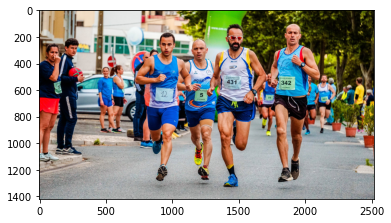

In [6]:
show_img_from_path(img_path)

## 运行目标检测预测

In [7]:
mmdet_results = inference_detector(det_model, img_path)

包含了MS COCO目标检测数据集 80 个类别每个预测框的以下信息：

左上角X坐标、左上角Y坐标、右下角X坐标、右下角Y坐标、置信度

In [8]:
len(mmdet_results)

80

In [9]:
# 行人
mmdet_results[0].shape

(33, 5)

In [10]:
# 自行车
mmdet_results[1].shape

(0, 5)

## 提取人体检测框

In [11]:
# 提取类别 ID 为 1 的 行人 目标检测框
person_results = process_mmdet_results(mmdet_results, cat_id=1)

In [12]:
len(person_results)

33

In [13]:
person_results[0]

{'bbox': array([1.7056345e+03, 9.6277733e+01, 2.1145239e+03, 1.3011721e+03,
        9.9941599e-01], dtype=float32)}

## 运行`top_down`自顶向下的人体姿态估计算法

In [14]:
pose_results, returned_outputs = inference_top_down_pose_model(pose_model, img_path, person_results, bbox_thr=0.3, format='xyxy', dataset='TopDownCocoDataset')


In [15]:
pose_results

[{'bbox': array([1.7056345e+03, 9.6277733e+01, 2.1145239e+03, 1.3011721e+03,
         9.9941599e-01], dtype=float32),
  'keypoints': array([[1.9159626e+03, 1.9864667e+02, 9.5111549e-01],
         [1.9394956e+03, 1.7511359e+02, 9.9092317e-01],
         [1.8924294e+03, 1.7511359e+02, 9.7071761e-01],
         [1.9630288e+03, 1.9864667e+02, 9.5346653e-01],
         [1.8571299e+03, 1.9864667e+02, 9.4796818e-01],
         [2.0100950e+03, 3.1631207e+02, 9.1708946e-01],
         [1.8100637e+03, 3.2807867e+02, 9.1445708e-01],
         [2.0924607e+03, 4.9281036e+02, 9.3698835e-01],
         [1.7747639e+03, 4.3397760e+02, 9.2081457e-01],
         [1.9865618e+03, 4.1044452e+02, 9.5315301e-01],
         [1.7629976e+03, 5.0457697e+02, 9.1509342e-01],
         [1.9630288e+03, 6.5754205e+02, 8.3194059e-01],
         [1.8335967e+03, 6.4577545e+02, 8.3686769e-01],
         [1.9394956e+03, 9.3993915e+02, 9.3957353e-01],
         [1.8218303e+03, 9.0463947e+02, 9.5527452e-01],
         [1.9277292e+03, 1.11

## 可视化人体姿态估计结果

In [19]:
vis_pose_result?

Signature:
vis_pose_result(
    model,
    img,
    result,
    radius=4,
    thickness=1,
    kpt_score_thr=0.3,
    bbox_color='green',
    dataset='TopDownCocoDataset',
    dataset_info=None,
    show=False,
    out_file=None,
)
Docstring:
Visualize the detection results on the image.

Args:
    model (nn.Module): The loaded detector.
    img (str | np.ndarray): Image filename or loaded image.
    result (list[dict]): The results to draw over `img`
            (bbox_result, pose_result).
    radius (int): Radius of circles.
    thickness (int): Thickness of lines.
    kpt_score_thr (float): The threshold to visualize the keypoints.
    skeleton (list[tuple()]): Default None.
    show (bool):  Whether to show the image. Default True.
    out_file (str|None): The filename of the output visualization image.
File:      ~/work/MMPose教程/mmpose/mmpose/apis/inference.py
Type:      function


In [27]:
vis_result = vis_pose_result(pose_model,
                             img_path,
                             pose_results, 
                             radius=8,
                             thickness=3,
                             dataset='TopDownCocoDataset', 
                             show=False)

In [28]:
vis_result.shape

(1418, 2520, 3)

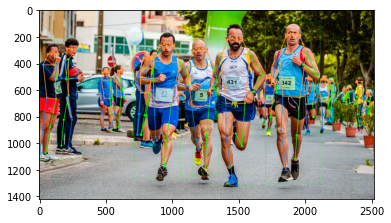

In [29]:
show_img_from_array(vis_result)

In [30]:
cv2.imwrite('outputs/B1_multi_human.jpg', vis_result)

True